# Self Organizing Map(SOM)

A ***self-organizing map*** (SOM) or ***self-organizing feature map*** (SOFM) is a type of artificial neural network (ANN) that is trained using unsupervised learning to produce a low-dimensional (typically two-dimensional), discretized representation of the input space of the training samples, called a map, and is therefore a method to do dimensionality reduction. Self-organizing maps differ from other artificial neural networks as they apply **competitive learning** as opposed to error-correction learning (such as backpropagation with gradient descent), and in the sense that they use a neighborhood function to preserve the topological properties of the input space.

<img src="./Images/SOM.png" />

* A Self-Organizing Map (SOM) is a way to represent higher dimensional data in an usually 2-D or 3-D manner, such that similar data is grouped together.

* It runs unsupervised and performs the grouping on its own.

* Once the SOM converges, it can only classify new data.  It is unlike traditional neural nets which are continuously learning and adapting.

* SOMs run in two phases:
    1. *Training phase*: map is built, network organizes using a competitive process, it is trained using large numbers of inputs (or the same input vectors can be administered multiple times).
    2. *Mapping phase*: new vectors are quickly given a location on the converged map, easily classifying or categorizing the new data.

## Training 

So how does the SOM grid learn the shape of our data? Well, this is done in an iterative process, which is summarized in the following steps, and visualized in the animated GIF below:

**Step 0**: Randomly position the grid’s neurons in the data space.

**Step 1**: Select one data point, either randomly or systematically cycling through the dataset in order

**Step 2**: Find the neuron that is closest to the chosen data point. This neuron is called the Best Matching Unit (BMU).

**Step 3**: Move the BMU closer to that data point. The distance moved by the BMU is determined by a learning rate, which decreases after each iteration.

**Step 4**: Move the BMU’s neighbors closer to that data point as well, with farther away neighbors moving less. Neighbors are identified using a radius around the BMU, and the value for this radius decreases after each iteration.

**Step 5**: Update the learning rate and BMU radius, before repeating Steps 1 to 4. Iterate these steps until positions of neurons have been stabilized.

<img src="Images/som-explaingif.gif" />

## Examples

Let us see SOM in action. We shall do the followin two tasks:
1. Represent a list of 3D color vectors (R, G, B) in 2D space such that similar colors end up together
2. Create a map fo the Iris dataset

In [1]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

## Color mapping

Training...

...ready!


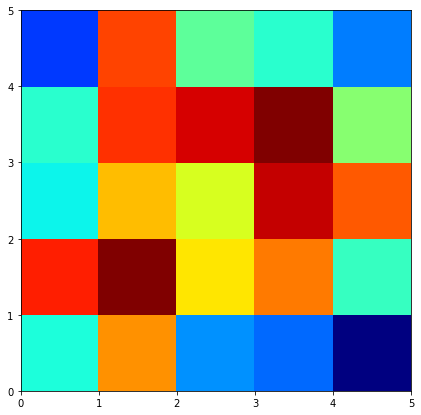

In [2]:
# Create random colors
raw_data = np.random.randint(0, 255, (100, 3))
# print(raw_data)

# data normalization
data = raw_data / 255
# Initialization and training
som = MiniSom(5, 5, 3, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)
som.random_weights_init(data)
# som.pca_weights_init(data)
print("Training...")
som.train_random(data, 5000)  # random training
print("\n...ready!")

plt.figure(figsize=(7, 7))
# Plotting the response for each pattern in the iris dataset
plt.pcolor(som.distance_map(), cmap='jet')  # plotting the distance map as background


## Iris 

Training...

...ready!


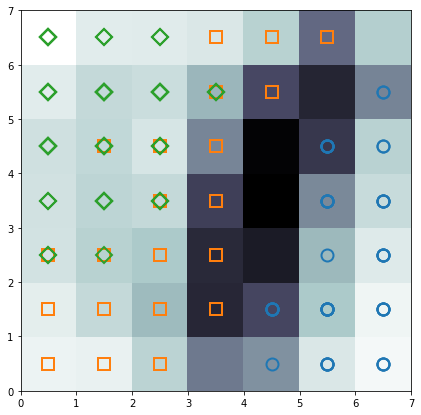

In [3]:
data = np.genfromtxt('./Data/iris.csv', delimiter=',', usecols=(1, 2, 3), skip_header=1)

# data normalization
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)
# Initialization and training
som = MiniSom(7, 7, 3, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)
#som.random_weights_init(data)
som.pca_weights_init(data)
print("Training...")
som.train_random(data, 4000)  # random training
print("\n...ready!")

plt.figure(figsize=(7, 7))
# Plotting the response for each pattern in the iris dataset
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

target = np.genfromtxt('./Data/iris.csv', delimiter=',', usecols=(5), dtype=str, skip_header=1)
t = np.zeros(len(target), dtype=int)
t[target == 'Iris-setosa'] = 0
t[target == 'Iris-versicolor'] = 1
t[target == 'Iris-virginica'] = 2

# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, 7, 0, 7])
plt.show()

In [7]:
from SOM import som
import imageio

# generate some random data with 36 features
data1 = np.random.normal(loc=-.25, scale=0.5, size=(100, 3))
data2 = np.random.normal(loc=.25, scale=0.5, size=(100, 3))
data = np.vstack((data1, data2))

targets = 100 * [0] + 100 * [1]  # create some dummy target values
som = som.SOM(10, 10)  # initialize the SOM

images = som.fit(data, targets, 100)

Epoch 0;    Neuron [0, 2];    	Sigma: 5.0000;    alpha: 0.6000
Epoch 1;    Neuron [8, 6];    	Sigma: 5.0000;    alpha: 0.6000
Epoch 2;    Neuron [6, 9];    	Sigma: 5.0000;    alpha: 0.6000
Epoch 3;    Neuron [3, 6];    	Sigma: 4.9999;    alpha: 0.6000
Epoch 4;    Neuron [6, 3];    	Sigma: 4.9998;    alpha: 0.6000
Epoch 5;    Neuron [4, 3];    	Sigma: 4.9995;    alpha: 0.5999
Epoch 6;    Neuron [9, 9];    	Sigma: 4.9989;    alpha: 0.5999
Epoch 7;    Neuron [1, 1];    	Sigma: 4.9980;    alpha: 0.5998
Epoch 8;    Neuron [7, 8];    	Sigma: 4.9966;    alpha: 0.5996
Epoch 9;    Neuron [9, 4];    	Sigma: 4.9945;    alpha: 0.5993
Epoch 10;    Neuron [3, 1];    	Sigma: 4.9917;    alpha: 0.5990
Epoch 11;    Neuron [4, 3];    	Sigma: 4.9878;    alpha: 0.5985
Epoch 12;    Neuron [9, 5];    	Sigma: 4.9828;    alpha: 0.5979
Epoch 13;    Neuron [5, 4];    	Sigma: 4.9763;    alpha: 0.5972
Epoch 14;    Neuron [6, 4];    	Sigma: 4.9682;    alpha: 0.5962
Epoch 15;    Neuron [3, 8];    	Sigma: 4.9582;    

In [8]:
imageio.mimwrite('./Images/som-learning.gif', np.array(images), fps=1)

<img src="./Images/som-learning.gif" />